In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt


In [2]:
# Define algumas variáveis
pasta_datasets = '../Datasets/'
pasta_planilhas = '../Planilhas/'
planilha = 'planilha_ipca.xls'

In [3]:
try:
    os.mkdir(pasta_datasets)
    print(f'"A pasta {pasta_datasets} foi criada.') 
except FileExistsError:
    print(f'"A pasta {pasta_datasets} já existe.') 

"A pasta ../Datasets/ já existe.


In [4]:
# Verifica se o arquivo 'planilha_ipca.xls' existe
planilha_ipca_existe = os.path.isfile(pasta_planilhas+planilha)

if planilha_ipca_existe:
    print(f'O arquivo {planilha} existe.') 
else:
    print(f'O arquivo {planilha} não existe, execute o Notebook anterior.') 


O arquivo planilha_ipca.xls existe.


In [5]:
# Define os tipos dos dados das colunas de interesse
# Apesar de haver na tabela colunas que abrangem a variação % do IPCA em vários meses (3, 6, 12), 
# para o presente trabalho será utilizada apena a variação % mensal.
tipo_dados = {'Ano': np.int64, 'Mes': str, 'Indice_Dez93': np.float64, 'Ipca_Mensal': np.float64}

# Carrega a planilha 'Série Histórica do IPCA'
# Os dados da série histórica iniciam na linha 9, assim as linhas anteriores serão ignoradas

df_ipca = pd.read_excel(pasta_planilhas+planilha, skiprows=8, usecols="A:D", sheet_name=0, header=None,
                   names = tipo_dados.keys())

display(df_ipca)

,Ano,Mes,Indice_Dez93,Ipca_Mensal
0,1994,JAN,141.31,41.31
1,NaN,FEV,198.22,40.27
2,NaN,MAR,282.96,42.75
3,NaN,ABR,403.73,42.68
4,NaN,MAI,581.49,44.03
...,...,...,...,...
421,NaN,NaN,NaN,NaN
422,NaN,NaN,NaN,NaN
423,NaN,NaN,NaN,NaN
424,NaN,NaN,NaN,NaN


In [6]:
df_ipca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ano           44 non-null     object
 1   Mes           345 non-null    object
 2   Indice_Dez93  350 non-null    object
 3   Ipca_Mensal   355 non-null    object
dtypes: object(4)
memory usage: 13.4+ KB


In [7]:
df_ipca['Mes'].unique()

array(['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET',
       'OUT', 'NOV', 'DEZ', nan, 'MÊS'], dtype=object)

In [8]:
# Verifica-se que há várias linhas que não correspondem aos dados mensais, e que estão em branco.
# Iremos utilizar como base a coluna Mes, removendo todos os valores que não são meses.

# Definição dos meses
meses = {'JAN': 1, 'FEV': 2, 'MAR': 3, 'ABR': 4, 'MAI': 5, 'JUN': 6, 
         'JUL': 7, 'AGO': 8, 'SET': 9, 'OUT': 10, 'NOV': 11, 'DEZ': 12}

# Remoção das linhas em que a coluna Mes possui um valor diferente dos possíveis no dicionário 'meses'
df_ipca = df_ipca.drop(df_ipca.index[~df_ipca['Mes'].isin(meses)])

display(df_ipca)
df_ipca.info()

,Ano,Mes,Indice_Dez93,Ipca_Mensal
0,1994,JAN,141.31,41.31
1,NaN,FEV,198.22,40.27
2,NaN,MAR,282.96,42.75
3,NaN,ABR,403.73,42.68
4,NaN,MAI,581.49,44.03
...,...,...,...,...
402,NaN,DEZ,6120.04,0.73
404,2022,JAN,6153.09,0.54
405,NaN,FEV,6215.24,1.01
406,NaN,MAR,6315.93,1.62


<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 407
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ano           29 non-null     object
 1   Mes           340 non-null    object
 2   Indice_Dez93  340 non-null    object
 3   Ipca_Mensal   340 non-null    object
dtypes: object(4)
memory usage: 13.3+ KB


In [9]:
# A coluna Ano está preenchida apenas quando o mês é Janeiro, então será 
# feita uma iteração para preencher os demais meses

temp_ano = -1
    
for idx in df_ipca.index:
    
    if(pd.notnull(df_ipca.loc[idx,'Ano'])==False):
        df_ipca.loc[idx,'Ano'] = temp_ano
    else:
        temp_ano = df_ipca.loc[idx,'Ano']
        
display(df_ipca)        

,Ano,Mes,Indice_Dez93,Ipca_Mensal
0,1994,JAN,141.31,41.31
1,1994,FEV,198.22,40.27
2,1994,MAR,282.96,42.75
3,1994,ABR,403.73,42.68
4,1994,MAI,581.49,44.03
...,...,...,...,...
402,2021,DEZ,6120.04,0.73
404,2022,JAN,6153.09,0.54
405,2022,FEV,6215.24,1.01
406,2022,MAR,6315.93,1.62


In [10]:
# A coluna Mes é convertida de texto para numérica

df_ipca['Mes'] = df_ipca['Mes'].map(meses)

display(df_ipca)

df_ipca.info()

,Ano,Mes,Indice_Dez93,Ipca_Mensal
0,1994,1,141.31,41.31
1,1994,2,198.22,40.27
2,1994,3,282.96,42.75
3,1994,4,403.73,42.68
4,1994,5,581.49,44.03
...,...,...,...,...
402,2021,12,6120.04,0.73
404,2022,1,6153.09,0.54
405,2022,2,6215.24,1.01
406,2022,3,6315.93,1.62


<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 407
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ano           340 non-null    object
 1   Mes           340 non-null    int64 
 2   Indice_Dez93  340 non-null    object
 3   Ipca_Mensal   340 non-null    object
dtypes: int64(1), object(3)
memory usage: 21.4+ KB


In [11]:
# Cria a coluna "Data" unificando as colunas Mes e Ano
df_ipca['Data'] = pd.to_datetime(df_ipca['Ano'].astype(str) + '-' + df_ipca['Mes'].astype(str))

In [12]:
# Efetua o drop das colunas 'Ano' e 'Mes'
df_ipca.drop(columns=['Ano','Mes'], inplace=True)

In [13]:
# Cria um novo índice com a coluna 'Data' 
df_ipca.set_index(['Data'], inplace=True)

In [14]:
# É importante que os dados do IPCA estejam no mesmo período da planilha Combustiveis
# Dessa forma, inicialmente é feita uma verificação no dataframe 'df_combustiveis' para obter esses valores.

#Definição de variáveis
planilha_combustiveis = '../Datasets/combustiveis.csv'

# Verifica se o arquivo 'combustiveis.csv' existe
planilha_combustiveis_existe = os.path.isfile(planilha_combustiveis)

if planilha_combustiveis_existe:
    print(f'O arquivo {planilha_combustiveis} existe.') 
else:
    print(f'O arquivo {planilha_combustiveis} não existe, execute o Notebook \'01 -  Gerar dataset da tabela Combustíveis a partir das planilhas\'') 

O arquivo ../Datasets/combustiveis.csv existe.


In [15]:
# Efetua a leitura do arquivo 'combustiveis.csv' 
df_combustiveis =  pd.read_csv(planilha_combustiveis,sep = ';',low_memory=False, 
                               parse_dates=['Data'],dayfirst = True,encoding='utf-8')

# Cria um novo índice com a coluna 'Data' 
df_combustiveis.set_index(['Data'], inplace=True)

display(df_combustiveis)
df_combustiveis.info()

,Regiao,Estado,Municipio,Produto,ValorVenda
Data,,,,,
2005-01-04,SE,SP,GUARULHOS,GASOLINA,2.257
2005-01-04,SE,SP,GUARULHOS,ETANOL,1.449
2005-01-04,SE,SP,SOROCABA,GASOLINA,2.210
2005-01-04,SE,SP,SOROCABA,ETANOL,1.230
2005-01-03,CO,DF,BRASILIA,GASOLINA,2.150
...,...,...,...,...,...
2021-12-31,SE,RJ,CAMPOS DOS GOYTACAZES,GASOLINA,7.090
2021-12-31,NE,BA,JEQUIE,ETANOL,5.859
2021-12-31,NE,BA,JEQUIE,GASOLINA,6.799


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12900965 entries, 2005-01-04 to 2021-12-31
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Regiao      object 
 1   Estado      object 
 2   Municipio   object 
 3   Produto     object 
 4   ValorVenda  float64
dtypes: float64(1), object(4)
memory usage: 590.6+ MB


In [16]:
# Verifica a menor e a maior data no dataframe 'df_combustiveis'
menor_data = df_combustiveis.index.min()
maior_data = df_combustiveis.index.max()

print('Menor data no dataframe df_combustiveis: ' + str(menor_data))
print('Maior data no dataframe df_combustiveis: ' + str(maior_data))

Menor data no dataframe df_combustiveis: 2005-01-03 00:00:00
Maior data no dataframe df_combustiveis: 2021-12-31 00:00:00


In [17]:
# O dados na tabela IPCA estão sempre no 1º dia do mês, então antes de ajustar os períodos dos dados do IPCA
# para corresponder com os de Combustíveis, é necessário que a 'menor_data' seja o primeiro dia do mês.
# Caso não faça esse ajuste, teremos problemas futuramente quando realizar o outer join no notebook seguinte.

menor_data = menor_data.replace(day=1)

In [18]:
# Ajusta os períodos dos dados do IPCA para os de Combustiveis
df_ipca = df_ipca.loc[menor_data:maior_data]

display(df_ipca)

,Indice_Dez93,Ipca_Mensal
Data,,
2005-01-01,2412.83,0.58
2005-02-01,2427.07,0.59
2005-03-01,2441.87,0.61
2005-04-01,2463.11,0.87
2005-05-01,2475.18,0.49
...,...,...
2021-08-01,5876.05,0.87
2021-09-01,5944.21,1.16
2021-10-01,6018.51,1.25


In [19]:
df_ipca.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 2005-01-01 to 2021-12-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Indice_Dez93  204 non-null    object
 1   Ipca_Mensal   204 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [20]:
# Verifica se ainda há linhas com valores nulos
df_ipca.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 2005-01-01 to 2021-12-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Indice_Dez93  204 non-null    object
 1   Ipca_Mensal   204 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


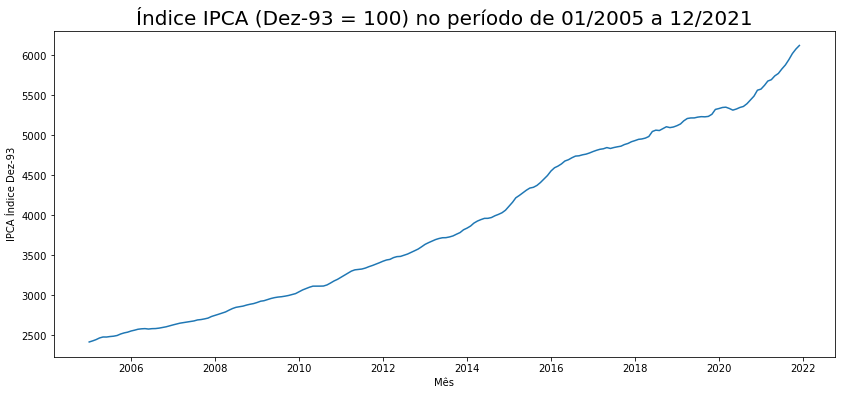

In [21]:
# Visualiza os dados do IPCA ao longo do tempo
fig, ax = plt.subplots(figsize=(14, 6))
plt.rcParams['font.size'] = '10'
plt.title('Índice IPCA (Dez-93 = 100) no período de ' + menor_data.strftime('%m/%Y') 
          + ' a ' + maior_data.strftime('%m/%Y'), fontdict={'size':20})
plt.ylabel('IPCA Índice Dez-93')
plt.xlabel('Mês')
plt.plot(df_ipca['Indice_Dez93'])
ax.ticklabel_format(style='plain',  axis='y')
plt.show();


In [22]:
# Exporta o dataset para um arquivo CSV
df_ipca.to_csv(pasta_datasets + 'ipca_mensal.csv', sep = ';',index=True)